In [1]:
from ioMicro import *

In [2]:
save_folder_ = r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\MERFISH_AnalysisP12'

In [6]:
from worker_Scope1__EmbryoPlate12Low import *

In [56]:
main_f(['_D16',59],redo_decoding=True)

Computing fitting on: Conv_zscan__059.zarr
18 ['\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H1_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H1_BMER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H2_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H3_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H4_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H4_lowMER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H5_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H6_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H7_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H8_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H9_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H10_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H11_MER_D16', '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H12_MER_D16', '\\\\192.168.0.6\\bbfi

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 204.51it/s]


Computing drift on: Conv_zscan__059.zarr
Completed


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [07:16<00:00, 145.65s/it]


Unfolded molecules: 162.3671269416809
Computed the decoding: 232.79973649978638


100%|██████████████████████████████████████████████████████████████████| 23365190/23365190 [03:53<00:00, 100097.14it/s]


Computed best unique assigment: 238.417644739151


['_D16', 59]

Loaded decoded: -16.070425510406494


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:10<00:00,  4.55it/s]


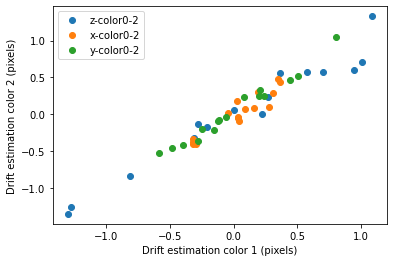

In [57]:
dec = decoder_simple(save_folder,fov='Conv_zscan__059',set_='_D16')
dec.ncols = 3
dec.load_decoded()
apply_fine_drift(dec,plt_val=True)
scoresRefT = get_score_per_color(dec)

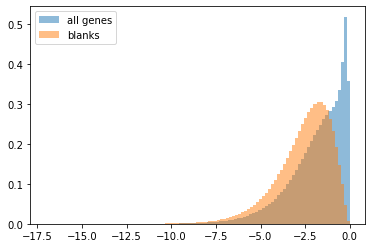

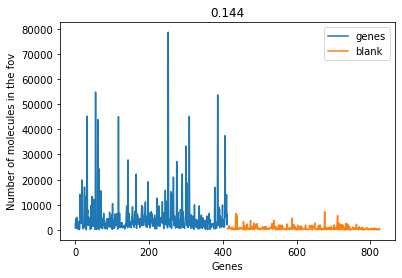

In [58]:
get_score_withRef(dec,scoresRefT,plt_val=True,gene=None,iSs = None)
dec.th=-1.5
plot_statistics(dec)

In [59]:
viewer = plot_multigenes(dec,genes=['Dcx'],colors=['r','g','b','m','c','y','w'],viewer = None,
                         smin=2,smax=10)

  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\asyncio\base_events.py", line 596, in run_forever
    self._run_once()
  File 

In [9]:
dec.load_library(lib_fl=library_file)
gene = 'Dcx'
ncols = 3
ign = list(dec.gns_names).index(gene)
ihybes = np.array(dec.codes__[ign])//ncols
icol = dec.codes__[ign][0]%ncols

In [14]:
dec.get_XH(dec.fov,dec.set_)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [01:05<00:00,  3.65s/it]


In [ ]:
dec.get_XH

In [33]:
import napari
fl_raw = r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\H101_MER_D16\Conv_zscan__059.zarr'
im = read_im(fl_raw)[icol]


In [27]:
drifts,flds,fov_ = np.load(dec.drift_fl,allow_pickle=True)
dec.drifts,dec.flds,dec.fov_ = drifts,flds,fov_

iiref = np.argmin([np.sum(np.abs(drft)) for drft,_ in dec.drifts])
fl = [fld+os.sep+dec.fov_ for fld in dec.flds][iiref]
im_dapi_ref = read_im(fl)[-1]
im_dapi = read_im(fl_raw)[-1]

sz = len(im_dapi)
szz=15
txyz,txyzs = get_txyz(im_dapi_ref[(sz-szz)//2:(sz+szz)//2],im_dapi[(sz-szz)//2:(sz+szz)//2],sz_norm=30,sz=600)

In [34]:
dec.XH = dec.XH[dec.XH[:,-4]>0.25]

In [43]:
XH_ = [dec.XH[icd==(dec.XH[:,-1].astype(int))]for icd in dec.codes__[ign]]

In [44]:
[len(XH__) for XH__ in XH_]

[1972123, 3062456, 1841811, 1632699]

In [54]:

v = napari.view_image(im,translate = -txyz)
#XH__ = XH_[0]
colors = ['r','g','b','y']
for ih,XH__ in enumerate(XH_):
    vmax = np.percentile(XH__[:,-3],99)
    size = np.clip(XH__[:,-3]/vmax,0,1)*10
    v.add_points(XH__[:,:3],size=size,face_color=[0,0,0,0],edge_color=colors[ih],out_of_slice_display=True)

In [61]:
def apply_fine_drift(dec,plt_val=True,npts=50000):
    bad_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn.lower()]
    good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
    is_good_gn = np.in1d(dec.icodesN,good_igns)
    XHG = dec.XH_pruned[is_good_gn]
    
    RG = XHG[:,:,-1].astype(int)
    iRs=np.unique(RG)
    dic_fine_drift = {}
    for iR in tqdm(iRs):
        XHGiR = XHG[np.any(RG==iR,axis=1)]
        RGiR  = XHGiR[...,-1].astype(int)
        mH = np.median(XHGiR[:,:,-3],axis=1)
        XHF = XHGiR[np.argsort(mH)[::-1][:npts]]
        RF  = XHF[...,-1].astype(int)
        XHFinR = XHF.copy()
        XHFiR = XHF.copy()
        XHFiR[~(RF==iR)]=np.nan
        XHFinR[(RF==iR)]=np.nan
        drift = np.mean(np.nanmean(XHFiR[:,:,:3],axis=1)-np.nanmean(XHFinR[:,:,:3],axis=1),axis=0)
        dic_fine_drift[iR]=drift
    drift_arr = np.array([dic_fine_drift[iR] for iR in iRs])
    if plt_val:
        ncols = len(np.unique(XHG[:,:,-2]))
        X1 = np.array([dic_fine_drift[iR] for iR in iRs[0::ncols]])
        X3 = np.array([dic_fine_drift[iR] for iR in iRs[(ncols-1)::ncols]])

        plt.figure()
        plt.plot(X1[:,0],X3[:,0],'o',label='z-color0-2')
        plt.plot(X1[:,1],X3[:,1],'o',label='x-color0-2')
        plt.plot(X1[:,2],X3[:,2],'o',label='y-color0-2')

        plt.xlabel("Drift estimation color 1 (pixels)")
        plt.ylabel("Drift estimation color 2 (pixels)")
        plt.legend()
    dec.drift_arr = drift_arr
    R = dec.XH_pruned[:,:,-1].astype(int)#
    dec.XH_pruned[:,:,:3] -= drift_arr[R]

Signature: apply_fine_drift(dec, plt_val=True, npts=50000)
Docstring: <no docstring>
Source:   
def apply_fine_drift(dec,plt_val=True,npts=50000):
    bad_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' in gn.lower()]
    good_igns = [ign for ign,gn in enumerate(dec.gns_names) if 'blank' not in gn.lower()]
    is_good_gn = np.in1d(dec.icodesN,good_igns)
    XHG = dec.XH_pruned[is_good_gn]
    
    RG = XHG[:,:,-1].astype(int)
    iRs=np.unique(RG)
    dic_fine_drift = {}
    for iR in tqdm(iRs):
        XHGiR = XHG[np.any(RG==iR,axis=1)]
        RGiR  = XHGiR[...,-1].astype(int)
        mH = np.median(XHGiR[:,:,-3],axis=1)
        XHF = XHGiR[np.argsort(mH)[::-1][:npts]]
        RF  = XHF[...,-1].astype(int)
        XHFinR = XHF.copy()
        XHFiR = XHF.copy()
        XHFiR[~(RF==iR)]=np.nan
        XHFinR[(RF==iR)]=np.nan
        drift = np.mean(np.nanmean(XHFiR[:,:,:3],axis=1)-np.nanmean(XHFinR[:,:,:3],axis=1),axis=0)
        dic_fine_drift[iR]=drift
    drift_arr = n

In [15]:
im_dapi = read_im(fl_raw)[-1]

In [16]:
napari.view_image(im_dapi)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1449.5, 1449.5), zoom=0.1749310344827586, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 30.0, 1.0), (0.0, 2900.0, 1.0), (0.0, 2900.0, 1.0)), current_step=(15, 1450, 1450), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'im_dapi' at 0x20d4249d6d0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_ver

In [22]:
def check_image(dec,tag = '_MER_',plt_val=False):
    drifts,flds,fov_ = np.load(dec.drift_fl,allow_pickle=True)
    dec.drifts,dec.flds,dec.fov_ = drifts,flds,fov_
    #print("Found files for fov:",fov_,flds)

    from dask import array as da
    im  = da.concatenate([da.roll(read_im(fld_+os.sep+fov_),drft[0],axis=[1,2,3])[np.newaxis]for fld_,drft in zip(flds,drifts)
                                                                         if tag in os.path.basename(fld_)])
    names = ([fld_+os.sep+fov_ for fld_,drft in zip(flds,drifts)
                                                                         if tag in os.path.basename(fld_)])
    if plt_val:   
        import napari
        v = napari.view_image(im)
        return v
    return im,names

In [62]:
im,names = check_image(dec,tag = '_MER_')

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1449.5, 1449.5), zoom=0.1133448275862069, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=5, ndisplay=2, last_used=0, range=((0.0, 16.0, 1.0), (0.0, 4.0, 1.0), (0.0, 30.0, 1.0), (0.0, 2900.0, 1.0), (0.0, 2900.0, 1.0)), current_step=(8, 2, 15, 1450, 1450), order=(0, 1, 2, 3, 4), axis_labels=('0', '1', '2', '3', '4')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'im' at 0x230a0bfdcd0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=Inter

In [43]:
np.argmin([np.sum(np.abs(drft[0])) for fld,drft in zip(dec.flds,dec.drifts)])

8

In [46]:
best_fld = np.array(dec.flds)[np.argmin([np.sum(np.abs(drft[0])) for fld,drft in zip(dec.flds,dec.drifts)])]

In [34]:
fl_raw = r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\H101_MER_D16\Conv_zscan__059.zarr'

In [65]:
fl_raw2 = r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\H4_lowMER_D16\Conv_zscan__059.zarr'
im_raw2 = read_im(fl_raw2)#[icol]H101
im_raw2_ = np.array(im_raw2[-1],dtype=np.float32)

In [47]:
im_raw = read_im(fl_raw)#[icol]H101
im_ref = read_im(best_fld+os.sep+os.path.basename(fl_raw))

In [49]:
im_raw_ = np.array(im_raw[-1],dtype=np.float32)
im_ref_ = np.array(im_ref[-1],dtype=np.float32)

In [66]:
tzxy2,tzxys2 = get_txyz(im_raw2_,im_ref_,sz_norm=30,sz=500)

In [68]:
#tzxys2

In [59]:
gene = 'Dcx'
ncols = 3
ign = list(dec.gns_names).index(gene)
ihybes = np.array(dec.codes__[ign])//ncols
icol = dec.codes__[ign][0]%ncols
import napari
v= napari.view_image(im[ihybes][:,icol])

In [60]:
import napari
v.add_image(im_raw[icol],translate = tzxy-[0,0,0])

<Image layer 'Image [1]' at 0x23021beb7c0>

In [69]:
v.add_image(im_raw2[icol],translate = tzxy2-[0,0,0])

<Image layer 'Image [1]' at 0x230fb2df5e0>

In [61]:
np.array(names)[ihybes]

array(['\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H2_MER_D16\\Conv_zscan__059.zarr',
       '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H4_MER_D16\\Conv_zscan__059.zarr',
       '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H9_MER_D16\\Conv_zscan__059.zarr',
       '\\\\192.168.0.6\\bbfishjoy4\\CGBB_embryo_4_28_2023\\H10_MER_D16\\Conv_zscan__059.zarr'],
      dtype='<U79')

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 1449.5, 1449.5), zoom=0.3947413793103448, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=2, last_used=0, range=((0.0, 4.0, 1.0), (0.0, 30.0, 1.0), (0.0, 2900.0, 1.0), (0.0, 2900.0, 1.0)), current_step=(2, 15, 1450, 1450), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'Image' at 0x231902825b0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=Fal

In [7]:
dec.load_library(r'C:\Users\BintuLabUser\BintuLabScripts1\MERFISH_DC_SCOPE2\Analysis_1500gns_MERFISH_dev\codebook_Mahsa_DevP1P2-code_color2__comb16-4-4_blank.csv')

In [12]:
len(dec.codes__)

826

array([1, 3, 8, 9], dtype=int64)